```
From: https://github.com/ksatola
Version: 0.1.0
```

# Model - PM2.5 - Machine Learning Baseline Reference Models

## Contents

- [Persistence Baseline Model for Forecasting](#base)
- [Load hourly data](#data_h)
- [Load daily data](#data_d)
- Naive Forecasting
    - [Zero Rule Algorithm](#saf)
    - [Persistence Model](#per)
- Moving Average Forecasts
    - [Simple Moving Average](#sma)
    - [Exponential Moving Average](#ema)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import sys
sys.path.insert(0, '../src')

In [4]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [14]:
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
from model import (
    #get_ensemble_models_for_regression,
    #get_analytical_view_for_meta_model,
    #fit_base_models,
    #fit_meta_model,
    #evaluate_models,
    #predict_with_super_learner
    get_pm25_data_for_modelling,
    split_df_for_ts_modelling_percentage,
    split_df_for_ts_modelling_date_range
)

from measure import (
    get_rmse
)

from plot import (
    plot_observed_vs_predicted,
    plot_train_test_predicted
)

---
<a id='base'></a>

## Persistence Baseline Model for Forecasting

Establishing a baseline is essential on any time series forecasting problem. A baseline in performance gives you an idea of how well all other models will actually perform on your problem.

A baseline in forecast performance provides a point of comparison. It is a point of reference for all other modeling techniques on your problem. If a model achieves performance at or below the baseline, the technique should be fixed or abandoned. 

The technique used to generate a forecast to calculate the baseline performance must be easy to implement and naive of problem-specific details. Once prepared, you then need to select a naive technique that you can use to make a forecast and calculate the baseline performance. Three properties of a good technique for making a baseline forecast are: 

- **Simple:** A method that requires little or no training or intelligence.
- **Fast:** A method that is fast to implement and computationally trivial to make a prediction.
- **Repeatable:** A method that is deterministic, meaning that it produces an expected output given the same input.

There can be many naive forecast methods, here we examine two:

- **Simple Average Forecast (Zero Rule Algorithm)**
- **Persistence Model**

## Moving Average Forecasts

With the `moving average approach` we take n values previously known, calculate their average and take it as the next value. This new value is then added to the training set and a new average of n lags is calculated to predict the next point (and so on). As a forecasting method, there are situations where this technique works the best.

`Moving average smoothing` is a naive and effective technique in time series forecasting. It can be used for data preparation, feature engineering, and even directly for making predictions.

Smoothing is a technique applied to time series to remove the fine-grained variation between time steps. The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes. `Moving averages` are a simple and common type of smoothing used in time series analysis and time series forecasting.

Moving average is a backbone to many algorithms, and one such algorithm is `Autoregressive Integrated Moving Average Model (ARIMA)`, which uses moving averages to make time series data predictions.

There are various types of moving averages:

- **Simple Moving Average (SMA):** uses a sliding window to take the average over a set number of time periods. It is an equally weighted mean of the previous n data.
- **Cumulative Moving Average (CMA):** Unlike simple moving average which drops the oldest observation as the new one gets added, cumulative moving average considers all prior observations. CMA averages out all of the previous data up until the current data point, which make it very similar to the `Simple Average Forecast` technique.
- **Exponential Moving Average (EMA):** gives more weight to the recent observations and as a result of which, it can be a better model or better capture the movement of the trend in a faster way. EMA's reaction is directly proportional to the pattern of the data. Since EMAs give a higher weight on recent data than on older data, they are more responsive to the latest data points value changes as compared to SMAs.

---
<a id='data_h'></a>

## Load hourly data

In [120]:
dfh = get_pm25_data_for_modelling('ts', 'h')
dfh.head()

common.py | 42 | get_pm25_data_for_modelling | 01-Jun-20 17:24:18 | INFO: Dataframe loaded: /Users/ksatola/Documents/git/air-polution/agh/data/dfpm25_2008-2018_hourly.hdf
common.py | 43 | get_pm25_data_for_modelling | 01-Jun-20 17:24:18 | INFO: Dataframe size: (96388, 1)


,pm25
Datetime,
2008-01-01 01:00:00,92.0
2008-01-01 02:00:00,81.0
2008-01-01 03:00:00,73.0
2008-01-01 04:00:00,60.5
2008-01-01 05:00:00,61.0


In [121]:
dfh.tail(24)

,pm25
Datetime,
2018-12-31 01:00:00,7.23137
2018-12-31 02:00:00,6.82297
2018-12-31 03:00:00,6.34370
2018-12-31 04:00:00,6.05348
2018-12-31 05:00:00,5.36824
2018-12-31 06:00:00,5.25741
2018-12-31 07:00:00,5.23353
2018-12-31 08:00:00,4.78421
2018-12-31 09:00:00,5.68586


In [122]:
train_range_from_h = '2008-01-01 02:00:00'
train_range_to_h = '2018-12-30 23:00:00'
test_range_from_h = '2018-12-31 01:00:00'
test_range_to_h = None

---
<a id='data_d'></a>

## Load daily data

In [123]:
dfd = get_pm25_data_for_modelling('ts', 'd')
dfd.head()

common.py | 42 | get_pm25_data_for_modelling | 01-Jun-20 17:24:20 | INFO: Dataframe loaded: /Users/ksatola/Documents/git/air-polution/agh/data/dfpm25_2008-2018_daily.hdf
common.py | 43 | get_pm25_data_for_modelling | 01-Jun-20 17:24:20 | INFO: Dataframe size: (4019, 1)


,pm25
Datetime,
2008-01-01,53.586957
2008-01-02,30.958333
2008-01-03,46.104167
2008-01-04,42.979167
2008-01-05,57.312500


In [124]:
dfd.tail(7)

,pm25
Datetime,
2018-12-26,17.102352
2018-12-27,15.274438
2018-12-28,18.614863
2018-12-29,16.241051
2018-12-30,15.514396
2018-12-31,12.595460
2019-01-01,36.607400


In [125]:
train_range_from_d = '2008-01-01'
train_range_to_d = '2018-12-25'
test_range_from_d = '2018-12-26'
test_range_to_d = None

---
<a id='saf'></a>

## Simple Average Forecast (Zero Rule Algorithm)
The most common baseline method for supervised machine learning is the `Zero Rule algorithm`. This algorithm predicts the majority class in the case of classification, or the average outcome in the case of regression. 

<img src="images/ts_002_simple_average.png" style="width: 800px;"/>

With the `Simple Average Forecast` approach we take all the values previously known, calculate the average and take it as all the next values.

This method is better from the `Persistence Model` (below) as it does not depend on the value of the last train dataset observation, instead it uses calculated once mean of the entire train dataset. Simple average and naive forecasting predict a constant value.

For a sesonal data we have here, this approach can be more fair (on average) but because of existing outliers, will be constantly wrong in most cases.

In [126]:
model_name = 'Simple Average Forecast'

### 24-Hour Prediction

In [127]:
df = dfh
df.head()

,pm25
Datetime,
2008-01-01 01:00:00,92.0
2008-01-01 02:00:00,81.0
2008-01-01 03:00:00,73.0
2008-01-01 04:00:00,60.5
2008-01-01 05:00:00,61.0


In [128]:
df_train, df_test = split_df_for_ts_modelling_date_range(df,
                                         train_range_from=train_range_from_h,
                                         train_range_to=train_range_to_h,
                                         test_range_from=test_range_from_h,
                                         test_range_to=test_range_to_h)

common.py | 127 | split_df_for_ts_modelling_date_range | 01-Jun-20 17:24:27 | INFO: Observations: 96388
common.py | 128 | split_df_for_ts_modelling_date_range | 01-Jun-20 17:24:27 | INFO: Training Observations: 96362
common.py | 129 | split_df_for_ts_modelling_date_range | 01-Jun-20 17:24:27 | INFO: Testing Observations: 24
common.py | 131 | split_df_for_ts_modelling_date_range | 01-Jun-20 17:24:27 | INFO: (96388, 1), (96362, 1), (24, 1), 96386


In [129]:
# Fit the model: Take an average of entire known dataset
model_fitted = df_train.mean()
model_fitted

pm25    37.201709
dtype: float64

In [130]:
# Predict
predicted = df_test.copy()
predicted['pred'] = model_fitted.values[0]
predicted

,pm25,pred
Datetime,,
2018-12-31 01:00:00,7.23137,37.201709
2018-12-31 02:00:00,6.82297,37.201709
2018-12-31 03:00:00,6.34370,37.201709
2018-12-31 04:00:00,6.05348,37.201709
2018-12-31 05:00:00,5.36824,37.201709
2018-12-31 06:00:00,5.25741,37.201709
2018-12-31 07:00:00,5.23353,37.201709
2018-12-31 08:00:00,4.78421,37.201709
2018-12-31 09:00:00,5.68586,37.201709


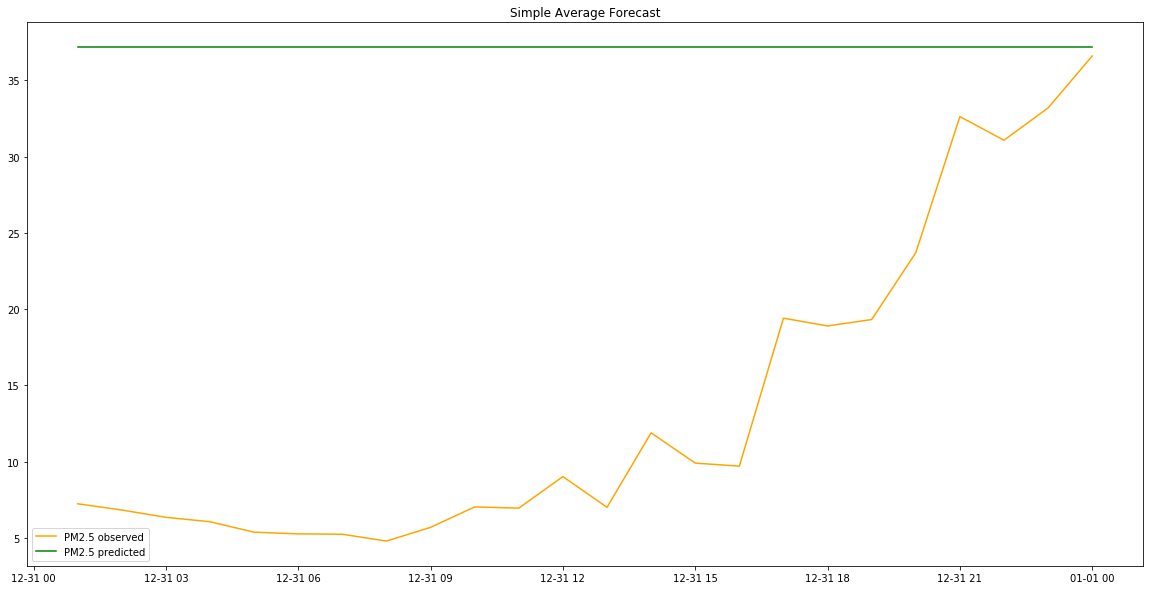

In [131]:
plot_observed_vs_predicted(observed=df_test['pm25'], 
                           predicted=predicted['pred'], 
                           num_points=50, 
                           title=model_name,
                           label_observed='PM2.5 observed', 
                           label_predicted='PM2.5 predicted')

In [132]:
rmse = get_rmse(observed=df_test['pm25'], predicted=predicted['pred'])
print(f'{model_name} RMSE {rmse}')

Simple Average Forecast RMSE 25.615


### 7-Day Prediction

In [133]:
df = dfd
df.head()

,pm25
Datetime,
2008-01-01,53.586957
2008-01-02,30.958333
2008-01-03,46.104167
2008-01-04,42.979167
2008-01-05,57.312500


In [134]:
df_train, df_test = split_df_for_ts_modelling_date_range(df,
                                         train_range_from=train_range_from_d,
                                         train_range_to=train_range_to_d,
                                         test_range_from=test_range_from_d,
                                         test_range_to=test_range_to_d)

common.py | 127 | split_df_for_ts_modelling_date_range | 01-Jun-20 17:24:40 | INFO: Observations: 4019
common.py | 128 | split_df_for_ts_modelling_date_range | 01-Jun-20 17:24:40 | INFO: Training Observations: 4012
common.py | 129 | split_df_for_ts_modelling_date_range | 01-Jun-20 17:24:40 | INFO: Testing Observations: 7
common.py | 131 | split_df_for_ts_modelling_date_range | 01-Jun-20 17:24:40 | INFO: (4019, 1), (4012, 1), (7, 1), 4019


In [135]:
# Fit the model: Take an average of entire known dataset
model_fitted = df_train.mean()
model_fitted

pm25    37.228923
dtype: float64

In [136]:
# Predict
predicted = df_test.copy()
predicted['pred'] = model_fitted.values[0]
predicted

,pm25,pred
Datetime,,
2018-12-26,17.102352,37.228923
2018-12-27,15.274438,37.228923
2018-12-28,18.614863,37.228923
2018-12-29,16.241051,37.228923
2018-12-30,15.514396,37.228923
2018-12-31,12.595460,37.228923
2019-01-01,36.607400,37.228923


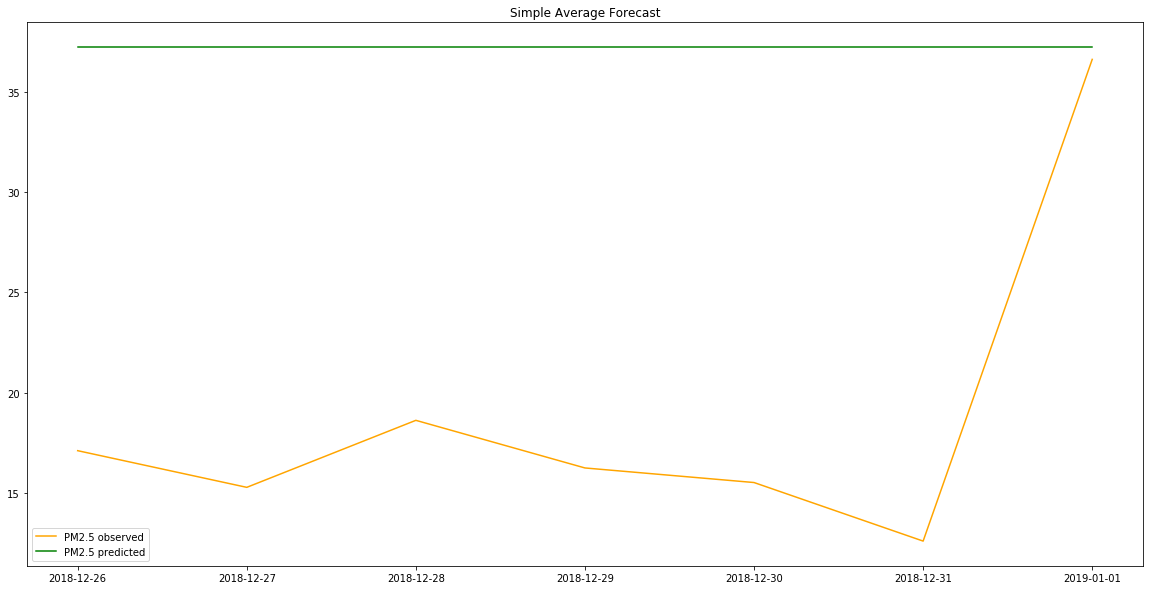

In [137]:
plot_observed_vs_predicted(observed=df_test['pm25'], 
                           predicted=predicted['pred'], 
                           num_points=50, 
                           title=model_name,
                           label_observed='PM2.5 observed', 
                           label_predicted='PM2.5 predicted')

In [138]:
rmse = get_rmse(observed=df_test['pm25'], predicted=predicted['pred'])
print(f'{model_name} RMSE {rmse}')

Simple Average Forecast RMSE 19.8306


---
<a id='per'></a>

## Persistence Model
The `Zero Rule algorithm` could be used for time series, but does not respect the serial correlation structure in time series datasets. The equivalent technique for use with time series dataset is the `Persistence Algorithm`.

This naive forecasting technique (creating the `Persistence Model`) assumes that the next expected point is equal to the last observed point. Baseline forecasts with the persistence model quickly flesh out whether you can do significantly better. If you can’t, you’re probably working with a random walk.

<img src="images/ts_001_naive.png" style="width: 800px;"/>

The `Persistence Algorithm` uses the value at the current time step (t) to predict the expected outcome at the next time step (t+1). This satisfies the three above conditions for a baseline forecast.

The Persistence Algorithm is naive. It is often called the `Naive Forecast`. It assumes nothing about the specifics of the time series problem to which it is applied. This is what makes it so easy to understand and so quick to implement and evaluate.

The actual prediction and other performance measures depend on the last train data point value, and will be different for different dataset resamples and train-test split ratio. The naive method isn’t suited for datasets with high variability.

In [140]:
model_name = 'Persistence Model'

### 24-Hour Prediction

In [141]:
df = dfh
df.head()

,pm25
Datetime,
2008-01-01 01:00:00,92.0
2008-01-01 02:00:00,81.0
2008-01-01 03:00:00,73.0
2008-01-01 04:00:00,60.5
2008-01-01 05:00:00,61.0


In [142]:
df_train, df_test = split_df_for_ts_modelling_date_range(df,
                                         train_range_from=train_range_from_h,
                                         train_range_to=train_range_to_h,
                                         test_range_from=test_range_from_h,
                                         test_range_to=test_range_to_h)

common.py | 127 | split_df_for_ts_modelling_date_range | 01-Jun-20 17:33:52 | INFO: Observations: 96388
common.py | 128 | split_df_for_ts_modelling_date_range | 01-Jun-20 17:33:52 | INFO: Training Observations: 96362
common.py | 129 | split_df_for_ts_modelling_date_range | 01-Jun-20 17:33:52 | INFO: Testing Observations: 24
common.py | 131 | split_df_for_ts_modelling_date_range | 01-Jun-20 17:33:52 | INFO: (96388, 1), (96362, 1), (24, 1), 96386


In [143]:
# Fit the model: Get last known observation from df_train
model_fitted = df_train[-1:]
model_fitted

,pm25
Datetime,
2018-12-30 23:00:00,10.669


In [144]:
# Predict
predicted = df_test.copy()
predicted['pred'] = model_fitted['pm25'].values[0]
predicted

,pm25,pred
Datetime,,
2018-12-31 01:00:00,7.23137,10.669
2018-12-31 02:00:00,6.82297,10.669
2018-12-31 03:00:00,6.34370,10.669
2018-12-31 04:00:00,6.05348,10.669
2018-12-31 05:00:00,5.36824,10.669
2018-12-31 06:00:00,5.25741,10.669
2018-12-31 07:00:00,5.23353,10.669
2018-12-31 08:00:00,4.78421,10.669
2018-12-31 09:00:00,5.68586,10.669


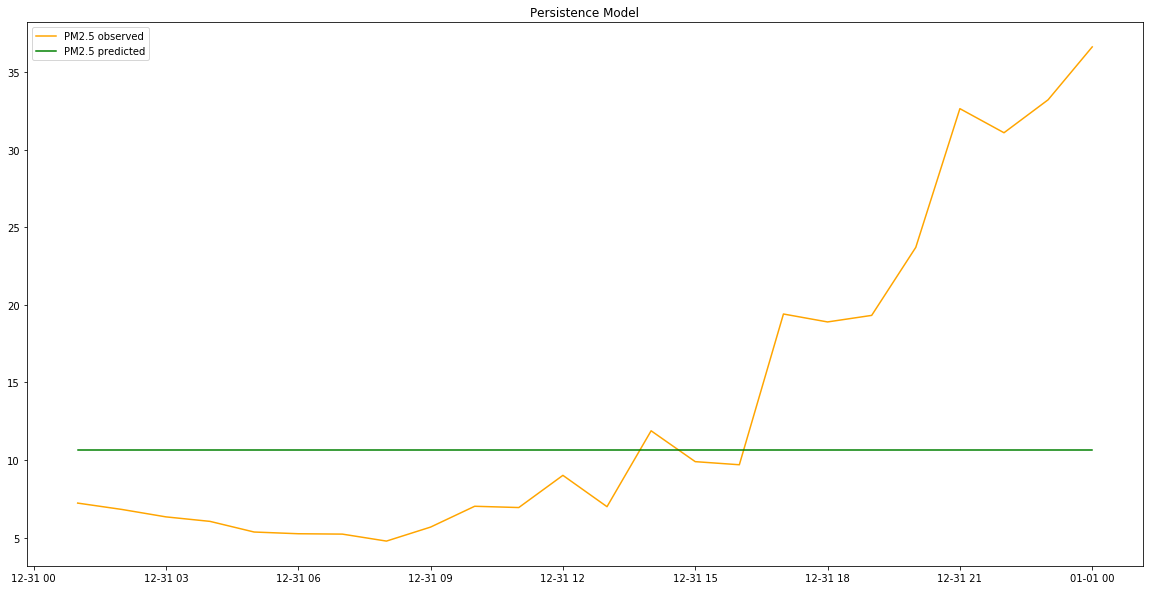

In [145]:
plot_observed_vs_predicted(observed=df_test['pm25'], 
                           predicted=predicted['pred'], 
                           num_points=50, 
                           title=model_name,
                           label_observed='PM2.5 observed', 
                           label_predicted='PM2.5 predicted')

In [147]:
rmse = get_rmse(observed=df_test['pm25'], predicted=predicted['pred'])
print(f'{model_name} RMSE {rmse}')

Persistence Model RMSE 10.6605


### 7-Day Prediction

In [148]:
df = dfd
df.head()

,pm25
Datetime,
2008-01-01,53.586957
2008-01-02,30.958333
2008-01-03,46.104167
2008-01-04,42.979167
2008-01-05,57.312500


In [149]:
df_train, df_test = split_df_for_ts_modelling_date_range(df,
                                         train_range_from=train_range_from_d,
                                         train_range_to=train_range_to_d,
                                         test_range_from=test_range_from_d,
                                         test_range_to=test_range_to_d)

common.py | 127 | split_df_for_ts_modelling_date_range | 01-Jun-20 17:37:32 | INFO: Observations: 4019
common.py | 128 | split_df_for_ts_modelling_date_range | 01-Jun-20 17:37:32 | INFO: Training Observations: 4012
common.py | 129 | split_df_for_ts_modelling_date_range | 01-Jun-20 17:37:32 | INFO: Testing Observations: 7
common.py | 131 | split_df_for_ts_modelling_date_range | 01-Jun-20 17:37:32 | INFO: (4019, 1), (4012, 1), (7, 1), 4019


In [150]:
# Fit the model: Get last known observation from df_train
model_fitted = df_train[-1:]
model_fitted

,pm25
Datetime,
2018-12-25,15.821442


In [151]:
# Predict
predicted = df_test.copy()
predicted['pred'] = model_fitted['pm25'].values[0]
predicted

,pm25,pred
Datetime,,
2018-12-26,17.102352,15.821442
2018-12-27,15.274438,15.821442
2018-12-28,18.614863,15.821442
2018-12-29,16.241051,15.821442
2018-12-30,15.514396,15.821442
2018-12-31,12.595460,15.821442
2019-01-01,36.607400,15.821442


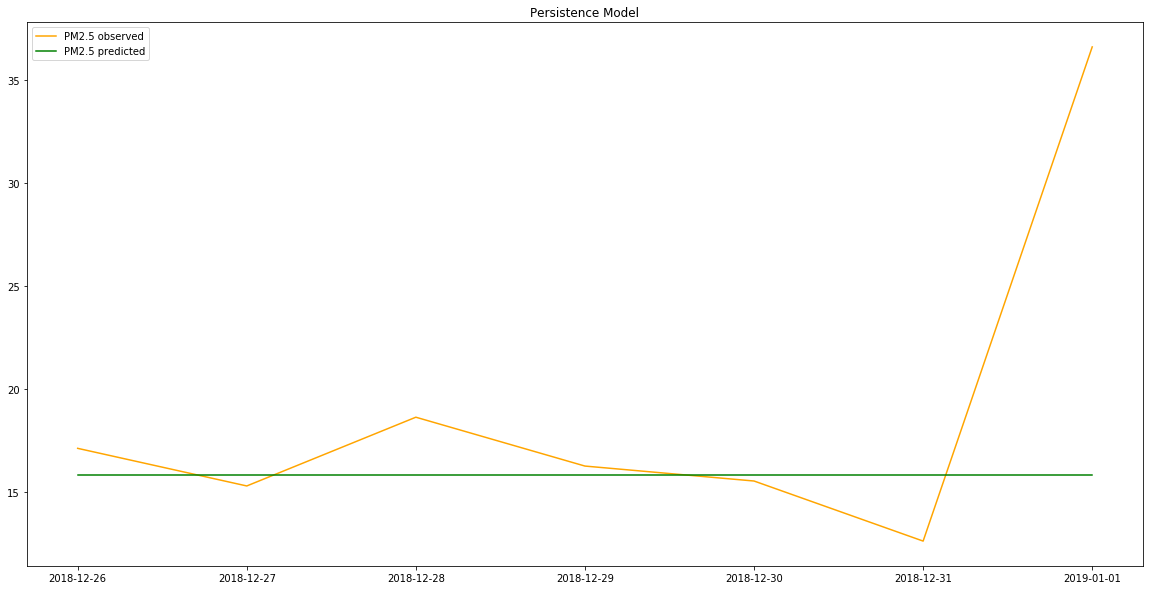

In [152]:
plot_observed_vs_predicted(observed=df_test['pm25'], 
                           predicted=predicted['pred'], 
                           num_points=50, 
                           title=model_name,
                           label_observed='PM2.5 observed', 
                           label_predicted='PM2.5 predicted')

In [153]:
rmse = get_rmse(observed=df_test['pm25'], predicted=predicted['pred'])
print(f'{model_name} RMSE {rmse}')

Persistence Model RMSE 8.0399


---
<a id='sma'></a>

## Simple Moving Average (SMA)

In [348]:
model_name = 'Simple Moving Average'

### 24-Hour Prediction

In [349]:
df = dfh
df.head()

,pm25
Datetime,
2008-01-01 01:00:00,92.0
2008-01-01 02:00:00,81.0
2008-01-01 03:00:00,73.0
2008-01-01 04:00:00,60.5
2008-01-01 05:00:00,61.0


In [350]:
df_train, df_test = split_df_for_ts_modelling_date_range(df,
                                         train_range_from=train_range_from_h,
                                         train_range_to=train_range_to_h,
                                         test_range_from=test_range_from_h,
                                         test_range_to=test_range_to_h)

common.py | 127 | split_df_for_ts_modelling_date_range | 01-Jun-20 19:25:57 | INFO: Observations: 96388
common.py | 128 | split_df_for_ts_modelling_date_range | 01-Jun-20 19:25:57 | INFO: Training Observations: 96362
common.py | 129 | split_df_for_ts_modelling_date_range | 01-Jun-20 19:25:57 | INFO: Testing Observations: 24
common.py | 131 | split_df_for_ts_modelling_date_range | 01-Jun-20 19:25:57 | INFO: (96388, 1), (96362, 1), (24, 1), 96386


In [351]:
# Different rolling window would be appropriate for different resamplings
rolling_window = 6 # for H
#rolling_window = 4 # for D

In [352]:
df_train.rolling(window=rolling_window).mean()[-1:]['pm25'][0]

11.201166666667154

In [353]:
df_test

,pm25
Datetime,
2018-12-31 01:00:00,7.23137
2018-12-31 02:00:00,6.82297
2018-12-31 03:00:00,6.34370
2018-12-31 04:00:00,6.05348
2018-12-31 05:00:00,5.36824
2018-12-31 06:00:00,5.25741
2018-12-31 07:00:00,5.23353
2018-12-31 08:00:00,4.78421
2018-12-31 09:00:00,5.68586


In [354]:
df_test[0:1].index

DatetimeIndex(['2018-12-31 01:00:00'], dtype='datetime64[ns]', name='Datetime', freq=None)

In [355]:
predicted = []
train = df_train.copy()

for i in range(len(df_test)):
    # Get the moving average for last element of train
    pred = train.rolling(window=rolling_window).mean()[-1:]['pm25'][0]
    # Add it as a predicted value
    predicted.append(pred)
    print(pred)
    # Create a new row with the next data point index from df_test
    train = train.append(df_test[i:i+1])
    # Replace df_test value with predicted value
    train.loc[df_test[i:i+1].index] = [pred]
    
predicted = train[-24:]

11.201166666667154
10.613994444445012
10.656276851852514
9.8692396604946
10.276846270577034
10.547753982339872
10.527546312729852
10.4152762537403
10.382156555289514
10.336469839195681
10.414341535645862
10.437257413157335
10.418841318293579
10.400723819220865
10.398298413467623
10.400988723163977
10.411741870492026
10.411308592966387
10.406983789601231
10.405007534819173
10.40572148741889
10.40695866641077
10.407953656951902
10.407322288028547


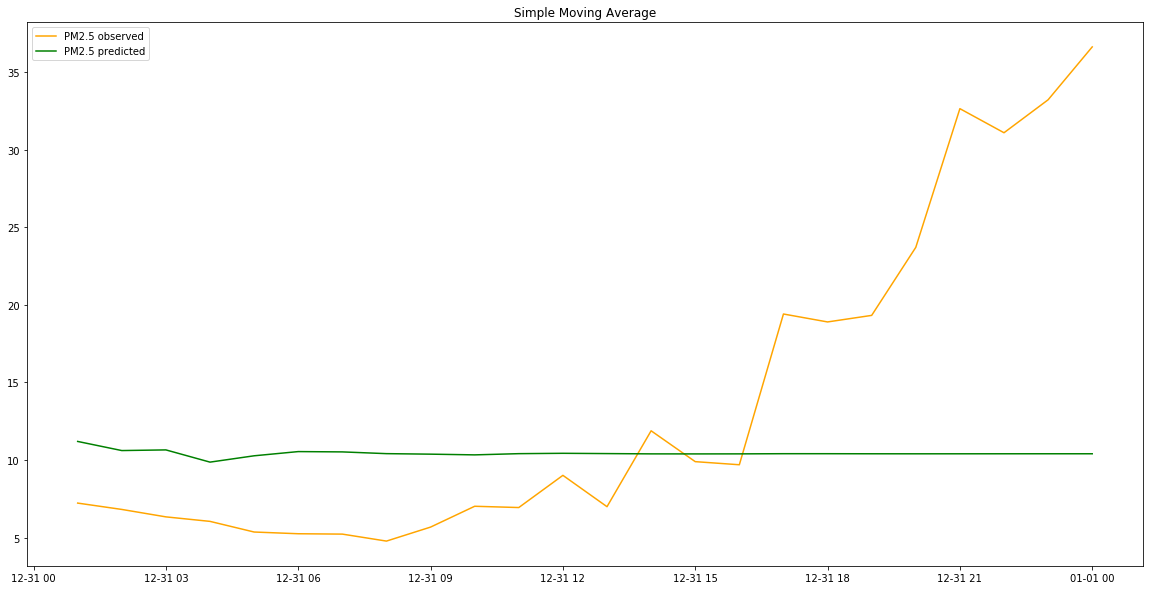

In [356]:
plot_observed_vs_predicted(observed=df_test['pm25'], 
                           predicted=predicted, 
                           num_points=50, 
                           title=model_name,
                           label_observed='PM2.5 observed', 
                           label_predicted='PM2.5 predicted'
                          )

In [357]:
rmse = get_rmse(observed=df_test['pm25'], predicted=predicted)
print(f'{model_name} RMSE {rmse}')

Simple Moving Average RMSE 10.7495


### 7-Day Prediction

In [358]:
df = dfd
df.head()

,pm25
Datetime,
2008-01-01,53.586957
2008-01-02,30.958333
2008-01-03,46.104167
2008-01-04,42.979167
2008-01-05,57.312500


In [359]:
df_train, df_test = split_df_for_ts_modelling_date_range(df,
                                         train_range_from=train_range_from_d,
                                         train_range_to=train_range_to_d,
                                         test_range_from=test_range_from_d,
                                         test_range_to=test_range_to_d)

common.py | 127 | split_df_for_ts_modelling_date_range | 01-Jun-20 19:26:37 | INFO: Observations: 4019
common.py | 128 | split_df_for_ts_modelling_date_range | 01-Jun-20 19:26:37 | INFO: Training Observations: 4012
common.py | 129 | split_df_for_ts_modelling_date_range | 01-Jun-20 19:26:37 | INFO: Testing Observations: 7
common.py | 131 | split_df_for_ts_modelling_date_range | 01-Jun-20 19:26:37 | INFO: (4019, 1), (4012, 1), (7, 1), 4019


In [360]:
# Different rolling window would be appropriate for different resamplings
#rolling_window = 14*24 # for H
rolling_window = 4 # for D

In [361]:
df_test

,pm25
Datetime,
2018-12-26,17.102352
2018-12-27,15.274438
2018-12-28,18.614863
2018-12-29,16.241051
2018-12-30,15.514396
2018-12-31,12.595460
2019-01-01,36.607400


In [362]:
predicted = []
train = df_train.copy()

for i in range(len(df_test)):
    # Get the moving average for last element of train
    pred = train.rolling(window=rolling_window).mean()[-1:]['pm25'][0]
    # Add it as a predicted value
    predicted.append(pred)
    print(pred)
    # Create a new row with the next data point index from df_test
    train = train.append(df_test[i:i+1])
    # Replace df_test value with predicted value
    train.loc[df_test[i:i+1].index] = [pred]
    
predicted = train[-7:]

12.05099427083306
13.243003046874659
12.289154016926659
13.351148354491658
12.73357492228124
12.904220085143287
12.819524344710445


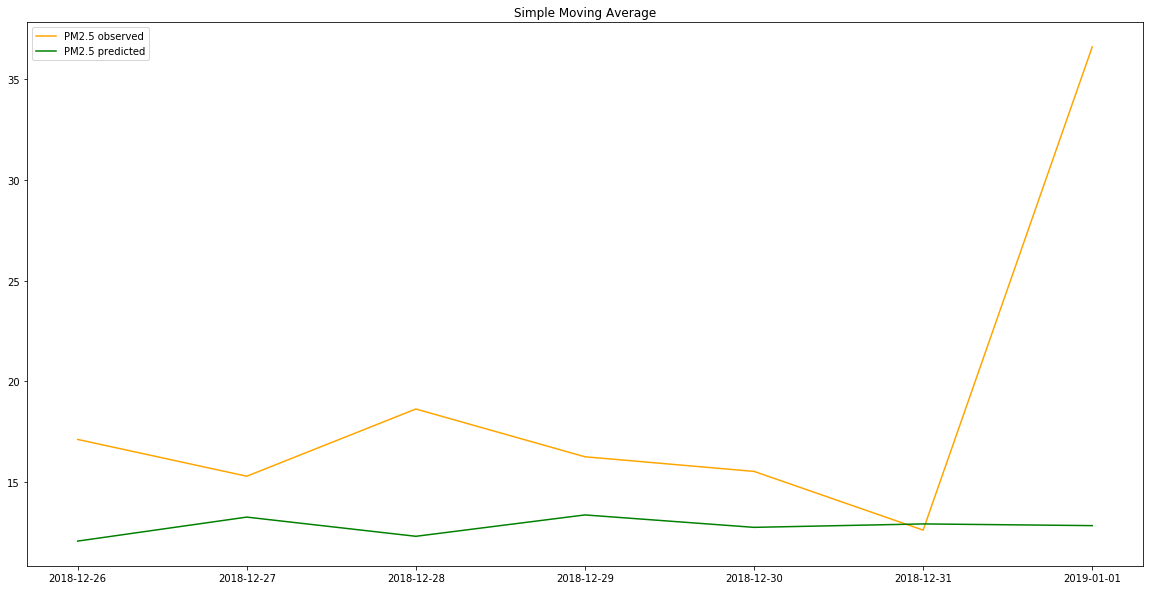

In [363]:
plot_observed_vs_predicted(observed=df_test['pm25'], 
                           predicted=predicted, 
                           num_points=50, 
                           title=model_name,
                           label_observed='PM2.5 observed', 
                           label_predicted='PM2.5 predicted')

In [364]:
rmse = get_rmse(observed=df_test['pm25'], predicted=predicted)
print(f'{model_name} RMSE {rmse}')

Simple Moving Average RMSE 9.6488


---
<a id='ema'></a>

## Exponential Moving Average

In [365]:
model_name = 'Exponential Moving Average'

### 24-Hour Prediction

In [366]:
df = dfh
df.head()

,pm25
Datetime,
2008-01-01 01:00:00,92.0
2008-01-01 02:00:00,81.0
2008-01-01 03:00:00,73.0
2008-01-01 04:00:00,60.5
2008-01-01 05:00:00,61.0


In [367]:
df_train, df_test = split_df_for_ts_modelling_date_range(df,
                                         train_range_from=train_range_from_h,
                                         train_range_to=train_range_to_h,
                                         test_range_from=test_range_from_h,
                                         test_range_to=test_range_to_h)

common.py | 127 | split_df_for_ts_modelling_date_range | 01-Jun-20 19:27:11 | INFO: Observations: 96388
common.py | 128 | split_df_for_ts_modelling_date_range | 01-Jun-20 19:27:11 | INFO: Training Observations: 96362
common.py | 129 | split_df_for_ts_modelling_date_range | 01-Jun-20 19:27:11 | INFO: Testing Observations: 24
common.py | 131 | split_df_for_ts_modelling_date_range | 01-Jun-20 19:27:11 | INFO: (96388, 1), (96362, 1), (24, 1), 96386


In [368]:
# Different rolling window would be appropriate for different resamplings
rolling_window = 6 # for H
#rolling_window = 4 # for D

In [369]:
predicted = []
train = df_train.copy()

for i in range(len(df_test)):
    # Get the moving average (Exponentially-weighted-window) for last element of train
    # https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows
    pred = train.ewm(span=30, adjust=False).mean()[-1:]['pm25'][0]
    # Add it as a predicted value
    predicted.append(pred)
    print(pred)
    # Create a new row with the next data point index from df_test
    train = train.append(df_test[i:i+1])
    # Replace df_test value with predicted value
    train.loc[df_test[i:i+1].index] = [pred]
    
predicted = train[-24:]

14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024
14.837553067366024


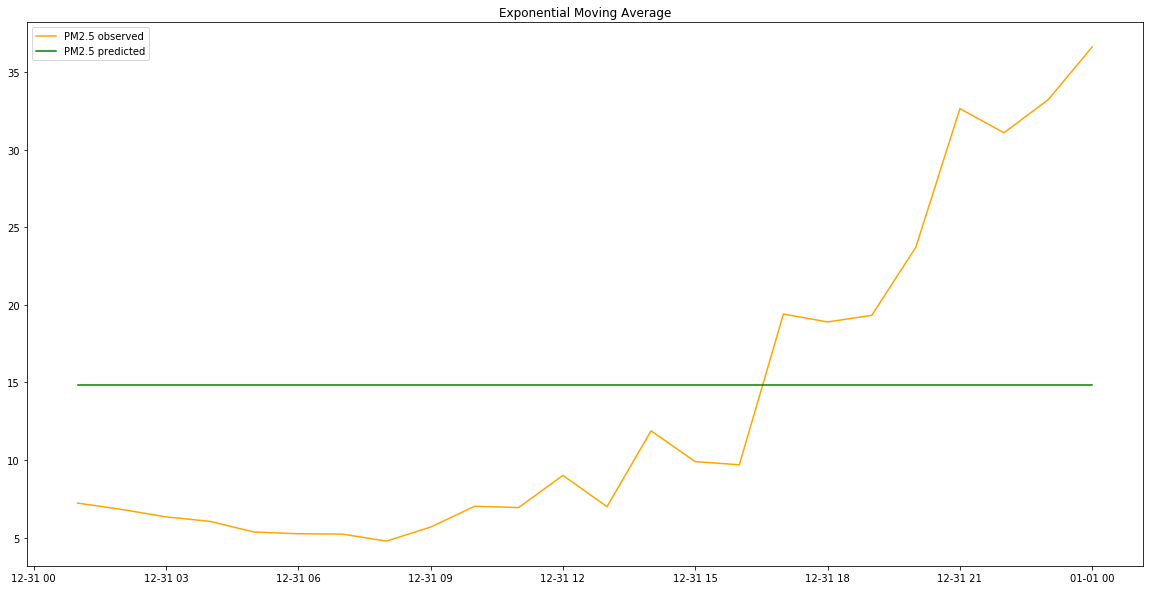

In [370]:
plot_observed_vs_predicted(observed=df_test['pm25'], 
                           predicted=predicted, 
                           num_points=50, 
                           title=model_name,
                           label_observed='PM2.5 observed', 
                           label_predicted='PM2.5 predicted')

In [371]:
rmse = get_rmse(observed=df_test['pm25'], predicted=predicted)
print(f'{model_name} RMSE {rmse}')

Exponential Moving Average RMSE 10.2786


### 7-Day Prediction

In [372]:
df = dfd
df.head()

,pm25
Datetime,
2008-01-01,53.586957
2008-01-02,30.958333
2008-01-03,46.104167
2008-01-04,42.979167
2008-01-05,57.312500


In [373]:
df_train, df_test = split_df_for_ts_modelling_date_range(df,
                                         train_range_from=train_range_from_d,
                                         train_range_to=train_range_to_d,
                                         test_range_from=test_range_from_d,
                                         test_range_to=test_range_to_d)

common.py | 127 | split_df_for_ts_modelling_date_range | 01-Jun-20 19:27:41 | INFO: Observations: 4019
common.py | 128 | split_df_for_ts_modelling_date_range | 01-Jun-20 19:27:41 | INFO: Training Observations: 4012
common.py | 129 | split_df_for_ts_modelling_date_range | 01-Jun-20 19:27:41 | INFO: Testing Observations: 7
common.py | 131 | split_df_for_ts_modelling_date_range | 01-Jun-20 19:27:41 | INFO: (4019, 1), (4012, 1), (7, 1), 4019


In [374]:
# Different rolling window would be appropriate for different resamplings
#rolling_window = 6 # for H
rolling_window = 4 # for D

In [375]:
predicted = []
train = df_train.copy()

for i in range(len(df_test)):
    # Get the moving average (Exponentially-weighted-window) for last element of train
    # https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows
    pred = train.ewm(span=30, adjust=False).mean()[-1:]['pm25'][0]
    # Add it as a predicted value
    predicted.append(pred)
    print(pred)
    # Create a new row with the next data point index from df_test
    train = train.append(df_test[i:i+1])
    # Replace df_test value with predicted value
    train.loc[df_test[i:i+1].index] = [pred]
    
predicted = train[-7:]

37.54717343098751
37.54717343098751
37.54717343098751
37.54717343098751
37.54717343098751
37.54717343098751
37.54717343098751


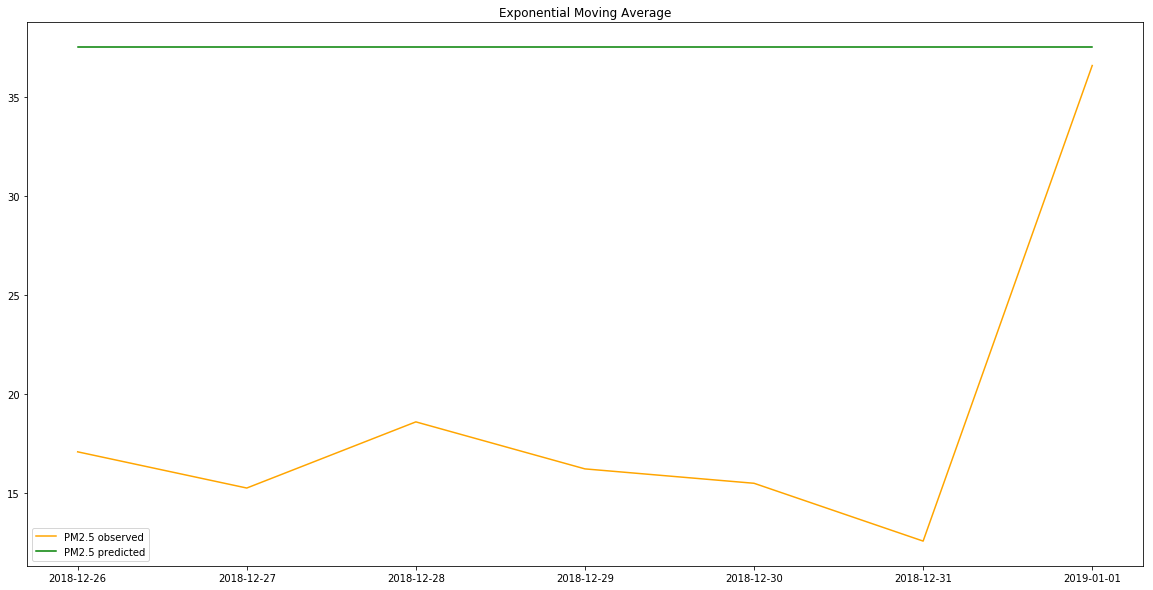

In [376]:
plot_observed_vs_predicted(observed=df_test['pm25'], 
                           predicted=predicted, 
                           num_points=50, 
                           title=model_name,
                           label_observed='PM2.5 observed', 
                           label_predicted='PM2.5 predicted')

In [378]:
rmse = get_rmse(observed=df_test['pm25'], predicted=predicted)
print(f'{model_name} RMSE {rmse}')

Exponential Moving Average RMSE 20.1259
